     ? ⟹ 代表user沒有對item評分

            ║ item1 ║ item2 ║ item3 ║ item4 ║ item5
     ═══════════════════════════════════════════════
      user1 ║   ?   ║   1   ║   ?   ║   3   ║   ? 
     ═══════════════════════════════════════════════  
      user2 ║   4   ║   ?   ║   ?   ║   2   ║   ?  
     ═══════════════════════════════════════════════             
      user3 ║   ?   ║   ?   ║   3   ║   ?   ║   ?
     ═══════════════════════════════════════════════          
      user4 ║   3   ║   ?   ║   1   ║   ?   ║   3
     ═══════════════════════════════════════════════            
      user5 ║   4   ║   3   ║   ?   ║   4   ║   ?
     ═══════════════════════════════════════════════          
      user6 ║   ?   ║   1   ║   ?   ║   4   ║   ?
<br>
目的就是要做出 𝓤(𝓂 ✖ 𝓀) 與 𝓥(𝓀 ✖ 𝓃) 這2個矩陣所相乘的矩陣可以跟上面的矩陣越像越好(𝓂要大於6，𝓃要大於5)<br>
而乘出來的矩陣 𝓦(𝓂 ✖ 𝓃) 的某一個 row 所對應的 column 的數值代表預測某一個user對於各個 item 的評分<br><br>
𝓂 ⟹ 代表user的數目<br>
𝓃 ⟹ 代表item的數目<br>
𝓀 ⟹ 代表隱變數的數目
<br><br>

可以把上述評分表「有評分」的部分拿出來排成一列

    (1 - 1) ✖ 5 ✚ 1 = 1   ➜ 1 
    (1 - 1) ✖ 5 ✚ 3 = 3   ➜ 3  
    (2 - 1) ✖ 5 ✚ 0 = 5   ➜ 4
    (2 - 1) ✖ 5 ✚ 3 = 8   ➜ 2
    (3 - 1) ✖ 5 ✚ 2 = 12  ➜ 3 
    (4 - 1) ✖ 5 ✚ 0 = 15  ➜ 3  
    (4 - 1) ✖ 5 ✚ 2 = 17  ➜ 1    
    (4 - 1) ✖ 5 ✚ 4 = 19  ➜ 3 
    (5 - 1) ✖ 5 ✚ 0 = 20  ➜ 4
    (5 - 1) ✖ 5 ✚ 1 = 21  ➜ 3
    (5 - 1) ✖ 5 ✚ 3 = 23  ➜ 4         
    (6 - 1) ✖ 5 ✚ 1 = 26  ➜ 1
    (6 - 1) ✖ 5 ✚ 3 = 28  ➜ 4 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('user_item.data' , sep = '\t' , names = ['user' , 'item' , 'rate' , 'time'])
msk = np.random.rand(len(df)) < 0.7
df_train = df.loc[msk]
df_train.head(10)

,user,item,rate,time
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
6,115,265,2,881171488
7,253,465,5,891628467
9,6,86,3,883603013
11,286,1014,5,879781125
12,200,222,5,876042340
13,210,40,3,891035994
14,224,29,3,888104457


In [3]:
# 將有評分部分的user之index以及item之index全部取出來
user_indecies = (np.array(df_train['user']) - 1).reshape([-1 , 1])
item_indecies = (np.array(df_train['item']) - 1).reshape([-1 , 1])
rates = (np.array(df_train['rate'])).reshape([-1 , 1])

In [4]:
# 假設有950個user(可自行決定)，一定要大於user_indecies.max()；另外假設有1700個item(可自行決定)，一定要大於item_indecies.max()
# 若沒有大於user_indecies.max()或item_indecies.max()，最後到tf.gather這一步會出錯
user_num , item_num = 950 , 1700
hidden_feature_num = 10

# hidden_feature_num代表隱變數之數目
U = tf.Variable(initial_value = tf.truncated_normal([user_num , hidden_feature_num]))
V = tf.Variable(initial_value = tf.truncated_normal([hidden_feature_num , item_num]))

In [5]:
result = tf.matmul(U , V)
result_flatten = tf.reshape(result , [-1])

# 把result_flatten中的 user_indecies * item_num + item_indecies 的項次(上述評分表有評分的部分)挑出來
approximate_rates = tf.gather(result_flatten , user_indecies * item_num + item_indecies) 

In [6]:
λ = 0.1
regularization = tf.reduce_mean(U) + tf.reduce_mean(V)
cost = tf.reduce_mean(tf.square(rates - approximate_rates)) + λ * regularization
train_step = tf.train.AdamOptimizer(0.02).minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_his = []
for step in range(0 , 1000):
    _ , loss = sess.run([train_step , cost])
    
    if step % 100 == 0:
        print('=' * 30)
        print('step : {}'.format(step))
        print('loss : {:.2f}'.format(loss))
        
    loss_his.append(loss)     

step : 0
loss : 19.87
step : 100
loss : 0.79
step : 200
loss : 0.56
step : 300
loss : 0.44
step : 400
loss : 0.36
step : 500
loss : 0.29
step : 600
loss : 0.23
step : 700
loss : 0.18
step : 800
loss : 0.13
step : 900
loss : 0.08


Text(0,0.5,'loss')

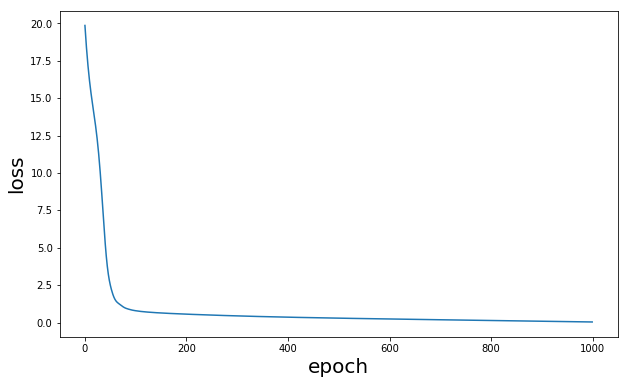

In [8]:
# plot cost curve
fig , ax = plt.subplots(1 , 1 , figsize = (10 , 6))
ax.plot(np.arange(len(loss_his)) , np.array(loss_his)) 
ax.set_xlabel('epoch' , fontsize = 20)
ax.set_ylabel('loss' , fontsize = 20)